In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/startup_data.csv')

# Extract the 'Funding Round' column
funding_rounds = df['Funding Round']

# Calculate the total funding rounds
total_funding_rounds = funding_rounds.sum()  # Assuming 'Funding Round' column contains numerical values

print("Total Funding Rounds:", total_funding_rounds)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total Funding Rounds: 1796


In [6]:
k = 2

In [7]:
import numpy as np

def detect_anomaly(data_array, k=2, threshold=1):
    if not isinstance(data_array, np.ndarray):
        raise ValueError("Input data_array must be a numpy array.")
    if len(data_array.shape) != 1:
        raise ValueError("Input data_array must be a 1-dimensional numpy array.")
    if k <= 0:
        raise ValueError("Value of k must be greater than 0.")
    if threshold <= 0:
        raise ValueError("Value of threshold must be greater than 0.")
    if k >= len(data_array):
        raise ValueError("Value of k must be less than the length of data_array.")

    anomalies = []
    n = len(data_array)
    for i, point in enumerate(data_array):
        other_points = np.delete(data_array, i)  # Exclude the current point
        distances = np.abs(other_points - point)  # Absolute distance
        sorted_distances = np.sort(distances)
        k_nearest = sorted_distances[:k]
        mean_distance = np.mean(k_nearest)
        if mean_distance > threshold:
            anomalies.append(point)
    return anomalies

anomalies = detect_anomaly(np.array(df["Funding Round"]))
print(anomalies)

non_anomalies = [point for point in np.array(df["Funding Round"]) if point not in anomalies]
print(non_anomalies)


[25, 23]
[12, 10, 4, 4, 7, 4, 11, 16, 17, 8, 11, 7, 6, 5, 8, 3, 6, 13, 8, 8, 7, 15, 18, 4, 5, 4, 11, 5, 3, 2, 9, 16, 3, 2, 7, 3, 6, 6, 3, 6, 24, 15, 5, 5, 7, 8, 11, 11, 8, 20, 13, 2, 7, 3, 6, 3, 5, 4, 8, 5, 8, 9, 6, 6, 4, 3, 5, 6, 10, 13, 10, 9, 7, 4, 2, 3, 9, 2, 8, 20, 5, 4, 5, 3, 4, 7, 5, 7, 1, 3, 5, 11, 2, 9, 2, 2, 3, 10, 1, 8, 2, 9, 8, 5, 3, 7, 21, 3, 5, 5, 6, 5, 11, 2, 5, 8, 4, 6, 4, 12, 3, 5, 6, 7, 5, 6, 2, 3, 12, 3, 6, 4, 3, 5, 6, 1, 5, 1, 4, 5, 16, 14, 6, 9, 3, 7, 3, 5, 6, 3, 6, 7, 2, 3, 12, 5, 9, 6, 2, 3, 3, 13, 4, 6, 4, 5, 5, 13, 9, 5, 3, 4, 9, 5, 8, 1, 14, 1, 8, 20, 3, 9, 6, 7, 7, 3, 3, 2, 11, 1, 7, 9, 4, 10, 2, 4, 3, 1, 5, 1, 3, 4, 6, 6, 7, 7, 5, 7, 4, 2, 7, 6, 7, 5, 1, 14, 2, 5, 5, 1, 2, 3, 2, 3, 6, 1, 3, 1, 7, 2, 4, 5, 3, 3, 2, 5, 8, 17, 2, 7, 2, 4, 10, 5, 2, 5, 4, 2, 6, 12, 3, 7, 6, 7, 4, 2, 3, 1, 3, 5, 4, 1, 7, 1, 5, 8, 10, 3, 7, 3, 5, 2, 3, 3, 3, 3, 5, 4, 1, 10, 4, 6, 3, 0, 4, 6, 3, 2, 5, 9, 10, 6, 1, 1, 7, 4, 1, 3]


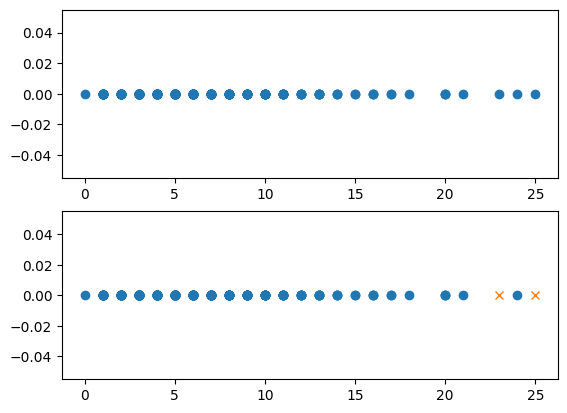

In [9]:
val = 0

plt.figure(1)
plt.subplot(211)
plt.plot(df['Funding Round'].values, np.zeros_like(df['Funding Round'].values) + val, 'o')  # plotting the original data
plt.subplot(212)
plt.plot(non_anomalies, np.zeros_like(non_anomalies) + val, 'o') # plotting the original data
plt.subplot(212)
plt.plot(anomalies, np.zeros_like(anomalies) + val, 'x') # plotting anomalies